# Betting Systems Simulation

We investigate betting systems. In particular, we explore the martingale.
Do martingales work? How do they behave with different parameters? What are alternative betting systems?

This document is structured as follows:
* Helper Functions
* Martingale Run
  * Several Martingale Runs
  * Other parameters
* How easy it is to go Bankrupt?
* Other betting systems
  * Reverse martingale
  * Fibonacci
  * D’Alembert
  * Constant Proportion


## Helper Functions

In [1]:
import random
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = [15,10] # width,height

We create functions to display the outcomes of the experiment. They are the following:
* `longest_streak`: Retrieves the longest streak of a value in a list
* `display_result`: Display a detailed plot with the bankroll; longest streaks of win and loses; and bets per run
* `display_result4_grid`: Display the plots of 4 executions of martingale as a grid of 2x2
* `display_result4_flat`: Display the plots of 4 executions of martingale as a grid of 1x4

In [3]:
#Function for computing the longest streak
def longest_streak(item_list,check_val):
    val_list=[float('inf')]+item_list+[float('inf')]
    current_streak=0
    max_streak=0
    for i in range(1,len(val_list)):
        if val_list[i]==check_val:
            current_streak=max(1,current_streak)
        # check wih previous
        if  val_list[i]==check_val and val_list[i-1]==val_list[i]:
            current_streak=current_streak+1
        else:
            max_streak=max(max_streak,current_streak)
            current_streak=0
    return max_streak

#Display results
def display_result(capital_history,win_lose_history,bet_history):
    #Plot capital
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax1.set_title('Bankroll')
    ax1.plot(capital_history)
    #Plot the bet per iteration
    ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
    ax2.set_title('Bet history')
    ax2.plot(bet_history)
    #Plot highest win/lose streak
    win_lose_streak=[
        longest_streak(win_lose_history,True),
        longest_streak(win_lose_history,False)
    ]
    ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
    ax3.set_title('Longest streak')
    ax3.bar(["win","lose"],win_lose_streak)
    #display plot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.90, wspace=0.2, hspace=0.3)
    plt.show()


def display_result4_grid(capital_history_array):
    #plot 1
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
    ax1.set_title('Bankroll (run 1)')
    ax1.plot(capital_history_array[0])
    #ax1.set_ylim(0,max(capital_history_array[0])+100)
    #plot 2
    ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
    ax2.set_title('Bankroll (run 2)')
    ax2.plot(capital_history_array[1])
    #plot 3
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
    ax3.set_title('Bankroll (run 3)')
    ax3.plot(capital_history_array[2])
    #plot 4
    ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
    ax4.set_title('Bankroll (run 4)')
    ax4.plot(capital_history_array[3])
    #show the plot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=0.2, hspace=0.3)
    plt.show()

def display_result4_flat(capital_history_array):
    #plot 1
    ax1 = plt.subplot2grid((1, 4), (0, 0), colspan=1)
    ax1.set_title('Bankroll (run 1)')
    ax1.plot(capital_history_array[0])
    #ax1.set_ylim(0,max(capital_history_array[0])+100)
    #plot 2
    ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=1)
    ax2.set_title('Bankroll (run 2)')
    ax2.plot(capital_history_array[1])
    #plot 3
    ax3 = plt.subplot2grid((1, 4), (0, 2), colspan=1)
    ax3.set_title('Bankroll (run 3)')
    ax3.plot(capital_history_array[2])
    #plot 4
    ax4 = plt.subplot2grid((1, 4), (0, 3), colspan=1)
    ax4.set_title('Bankroll (run 4)')
    ax4.plot(capital_history_array[3])
    #show the plot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=0.2, hspace=0.3)
    plt.show()


## Martingale Run

Martingale betting system consist of performing several bets where we double the bet after each loss (and return to the initial bet after a win). The reason for this is that next win should compensate the previous loss (or losses).

On ideal condition (probability of wining is 0.5, there is no minimum and maximum bet) and assuming we having infinite money, it should end on profit.

We define a simple martingale run:

In [4]:
def roll_dice(prob=50):
    roll = random.randint(1,100)
    if roll <= prob:
        return True
    else:
        return False


def game(capital,bet):
    is_win=roll_dice()
    if is_win:
        capital=capital+bet
    else:
        capital=capital-bet
    return [is_win,capital]

def martingale_run(initial_capital,initial_bet,multiplier=2):
    capital=initial_capital
    bet=initial_bet
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [is_win,capital]=game(capital,bet)
        if is_win==True:
            bet=initial_bet
        else:
            bet=bet*multiplier
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(is_win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]


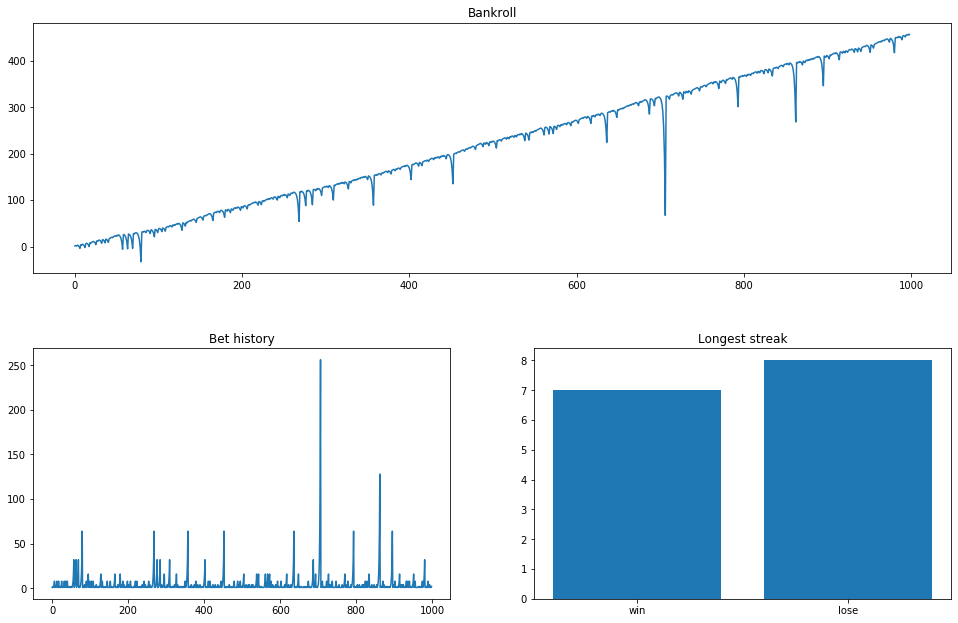

In [5]:
random.seed(111)
MAX_RUNS=1000

initial_capital=0
initial_bet=1

[capital_history,win_lose_history,bet_history]=martingale_run(initial_capital,initial_bet)
display_result(capital_history,win_lose_history,bet_history)

We encourage to use the code and try this method with different settings.

In the plot we observe why martingale can be risky. Although long streaks of losses seem improbable, in the long run they do happen (the longest lose streak is of 8, which implies a bet of $2^8=256$). In the case of not having enough money for the enxt bet, it would mean to go bankrupt.

### Several Martingale Runs

Let's explore more runs of the martingale.

We define a function to run 4 experiments (the function is given in as the `martingale_func` parameter)

In [6]:
def run4_martingale(martingale_func,*args, **kwargs):
    #run 1
    random.seed(1)
    #func2=martingale_func.copy()
    [capital_history1, win_lose_history1, bet_history1]=martingale_func(*args, **kwargs)
    #run 2
    random.seed(2)
    #func3=martingale_func.copy()
    [capital_history2, win_lose_history1, bet_history1]=martingale_func(*args, **kwargs)
    #run 3
    random.seed(3)
    [capital_history3, win_lose_history1, bet_history1]=martingale_func(*args, **kwargs)
    #run 4
    random.seed(4)
    [capital_history4, win_lose_history1, bet_history1]=martingale_func(*args, **kwargs)
    #display
    capital_history_array=[capital_history1, capital_history2, capital_history3, capital_history4]
    display_result4_flat(capital_history_array) 


We execute four runs for each experiment as follows:

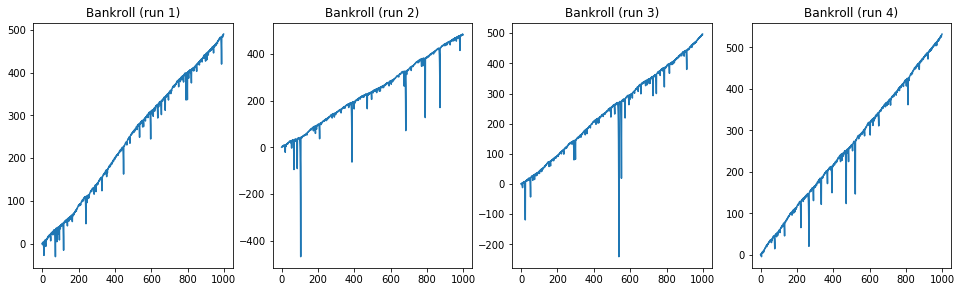

In [7]:
plt.rcParams['figure.figsize'] = [15,4] # width,height
# execute as: run4_martingale(func, param1, param2)
initial_capital=0
run4_martingale(martingale_run,initial_capital,initial_bet)

### Other parameters

#### Initial Bankroll

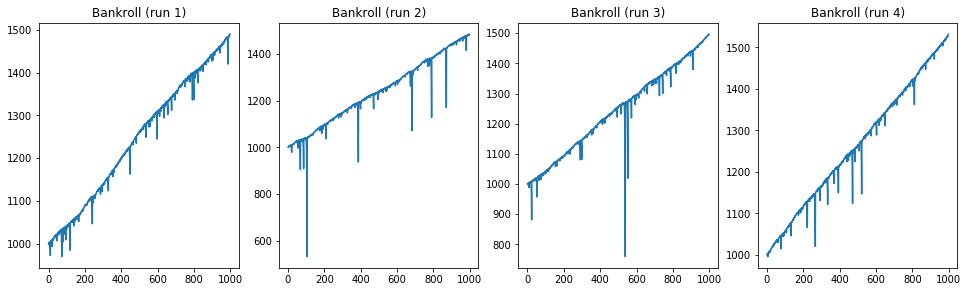

In [8]:
# execute as: run4_martingale(func, param1, param2)
initial_capital=1000
initial_bet=1
run4_martingale(martingale_run,initial_capital,initial_bet)

#### Multiplier 3

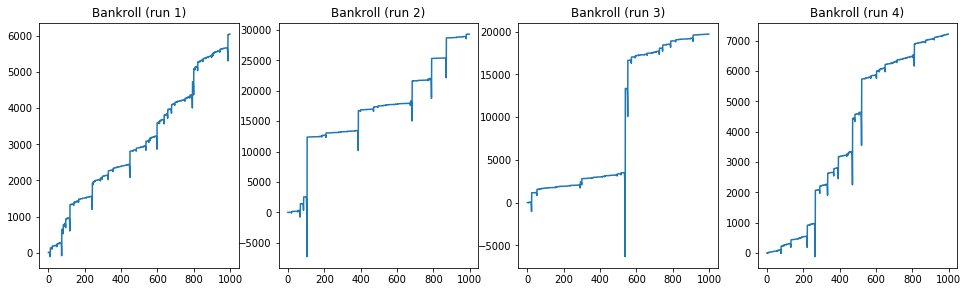

In [9]:
# execute as: run4_martingale(func, param1, param2)
initial_capital=0
initial_bet=1
run4_martingale(martingale_run,initial_capital,initial_bet,multiplier=3)

The losses are much higher (unaffordable). We find minimums around -5000. However after 1K iterations the bankroll is between 7000 and 30000, whereas with a multiplier of 2 the maximum benefits where about 500.

#### Adding a stoploss
If at some point losing a bet would imply to going below a certain amount, then assume the loss and restart the bet. (in the example we use the initial bankroll as stop loss).

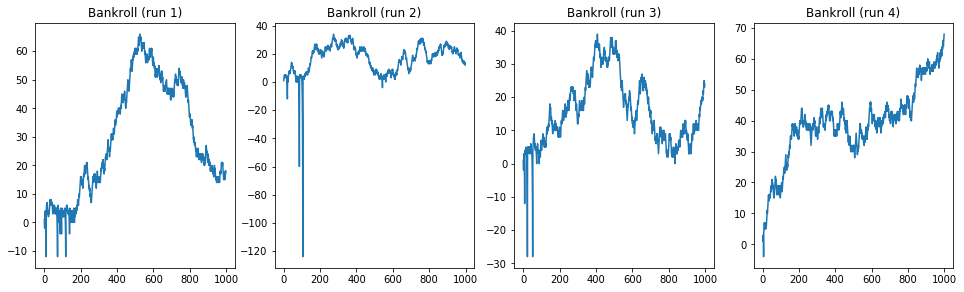

In [10]:
def martingale_run_stoploss(initial_capital,initial_bet,multiplier=2,stop_loss=0):
    bet=initial_bet
    capital=initial_capital
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [is_win,capital]=game(capital,bet)
        if is_win==True:
            bet=initial_bet
        else:
            bet=bet*multiplier
        if (capital-bet)>stop_loss: #If I risk to go below the stop loss, assume the loss
            bet=initial_bet
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(is_win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=0
initial_bet=1
current_stop_loss=initial_capital
run4_martingale(martingale_run_stoploss,initial_capital,initial_bet,stop_loss=current_stop_loss)

## How easy it is to go Bankrupt?

So far we have executed four experiments. In this section we execute several experiments and analyze in which round it would cause to go bankrupt.

In [11]:
NUM_EXPERIM=100
def plot_martingale_bankrupt(martingale_func,*args, **kwargs):
    bankrupt=[]
    for i in range(NUM_EXPERIM):
        [capital_history, win_lose_history, bet_history]=martingale_func(*args, **kwargs)
        first_negative=next(obj for obj in capital_history+[-1] if obj<0)
        bankrupt_iter=(capital_history+[-1]).index(first_negative)
        bankrupt.append(bankrupt_iter)
    #plot results
    bankrupt.sort()
    plt.plot(bankrupt)
    plt.show()

We start with a capital of 1500, and plot in which iteration we go bankrupt. 

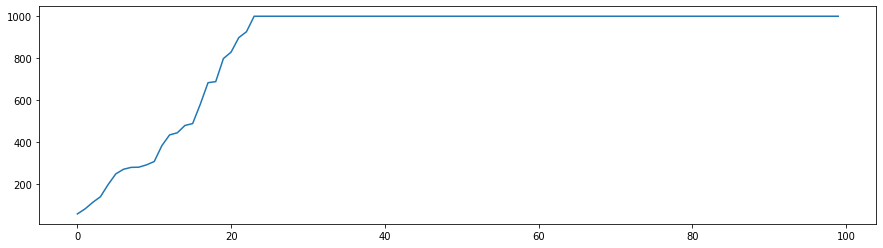

In [12]:
random.seed(0)
initial_capital=1500
initial_bet=1
plot_martingale_bankrupt(martingale_run,initial_capital,initial_bet)

We see that out of 100 runs in around 20 of them goes bankrupt before the 1000th iteration. The rest (from 20th to 1000th experiment) we end without losing everything.

## Other betting systems

Although martingale is the most popular etting sistem, there are alternatives. We describe some of them in this section.

### Reverse martingale

The idea of the reverse martingale is the oposite: Multiply the bet on win, and restart it on lose. The bets are multiplied after each, win hoping a win streak will compensate the loss.

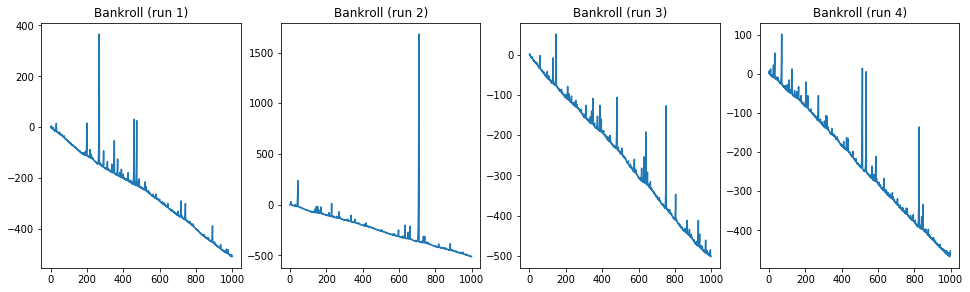

In [13]:
#plt.rcParams['figure.figsize'] = [12,3] # width,height
def reverse_martingale_run(initial_capital,initial_bet,multiplier=2):
    capital=initial_capital
    bet=initial_bet
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [is_win,capital]=game(capital,bet)
        if is_win==True:   
            bet=bet*multiplier
        else:
            bet=initial_bet
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(is_win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=0
initial_bet=1
run4_martingale(reverse_martingale_run,initial_capital,initial_bet)

We see that if we stop after a certain win streak, there could be profits.

#### Reverse martingale (with profit limit)

Let's modify the method so it is restarted after a certain gain (e.g. 10).

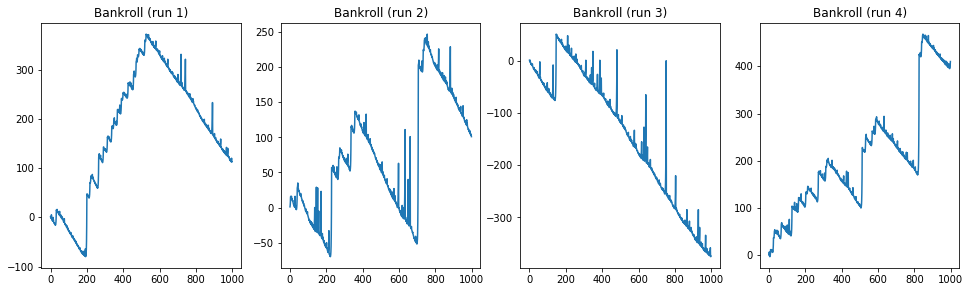

In [14]:
def reverse_martingale_run(initial_capital,initial_bet,multiplier=2,gain=0):
    capital=initial_capital
    bet=initial_bet
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [is_win,capital]=game(capital,bet)
        if is_win==True:   
            bet=bet*multiplier
            if capital>initial_capital+gain: # if the win streak is profitable, restart
                bet=initial_bet
                initial_capital=capital
        else:
            bet=initial_bet
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(is_win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=0
initial_bet=1
run4_martingale(reverse_martingale_run,initial_capital,initial_bet,gain=10)

### Fibonacci

To make the martingale less risky, there is the fibonacci alternative. The idea is to avoid high amounts of bets. Instead of compensating a streak of losses with a single (high bet) win, we hope to compensate it on several wins.

It consist of beting according to the sequence of fibonacci (e.g. 1,1,2,3,5,8,13,21...). The first bet is one of the number in the sequence. Then, in the case of losing, the amount of the next bet would the next number in the sequence. In case of wining, the amount of the next bet should be two steps back of the sequence.

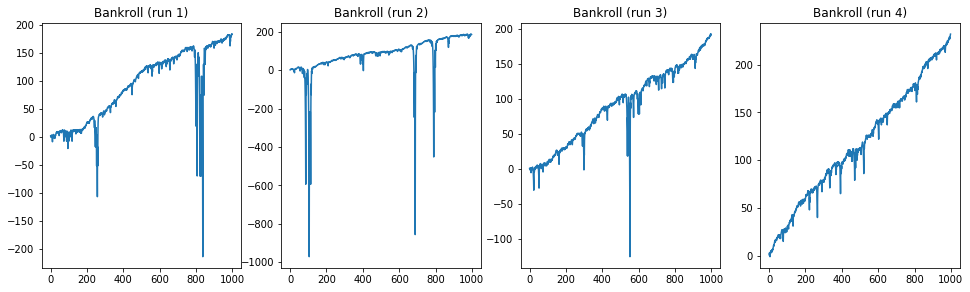

In [15]:
def fibonacci_run(initial_capital): 
    #bet=initial_bet 
    capital=initial_capital 
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    fibonacci_history=[1,1]
    for i in range(3,25):
        current_fib=fibonacci_history[-2]+fibonacci_history[-1]
        fibonacci_history.append(current_fib)
    fib_index=0
    bet=fibonacci_history[fib_index]
    for i in range(1,MAX_RUNS):
        [win,capital]=game(capital,bet)
        if win==True:
            fib_index=max(0,fib_index-2)
            bet=fibonacci_history[fib_index]
        else:
            fib_index=fib_index+1
            bet=fibonacci_history[fib_index] 
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=0
run4_martingale(fibonacci_run,initial_capital)

### D’Alembert

A system so, with a same number of wins and loses, the overall is a profit.
It consist of increasing a unit (of the bet) after a loss and decrease after a win.

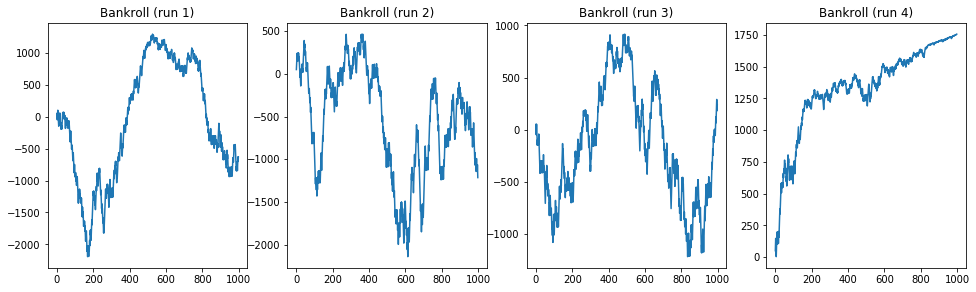

In [16]:
def dAlembert_run(initial_capital,initial_bet): 
    bet=initial_bet 
    capital=initial_capital 
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [win,capital]=game(capital,bet)
        if win==True:
            bet=bet-1
            #adjust so it is never lower than 1
            bet=max(bet,1)
        else:
            bet=bet+1
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=0
initial_bet=50
run4_martingale(dAlembert_run,initial_capital,initial_bet)

### Constant Proportion
A betting system that consist of betting a percentage of the capital (e.g. 10% of the current capital).

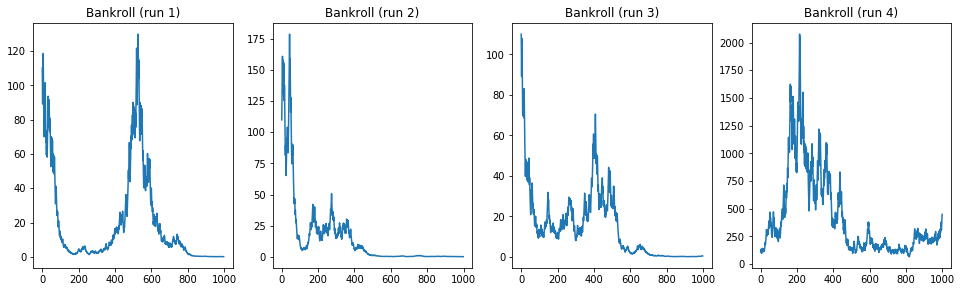

In [17]:
def constant_proportion_run(initial_capital,bet_frac=0.1): 
    capital=initial_capital 
    bet=capital*bet_frac
    capital_history=[]
    win_lose_history=[]
    bet_history=[]
    for i in range(1,MAX_RUNS):
        [win,capital]=game(capital,bet)
        bet=capital*bet_frac #update the bet amount based on the current capital
        #add to the historic
        capital_history.append(capital)
        win_lose_history.append(win)
        bet_history.append(bet)
    return [capital_history,win_lose_history,bet_history]

initial_capital=100
run4_martingale(constant_proportion_run,initial_capital,bet_frac=0.1)

References:
https://casino.guru/roulette-scam-strategies